In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [53]:
import numpy as np

# define vector field functions

def DavisSkodje(t, u, PARAMETERS=[10]):
    [gamma] = PARAMETERS
    assert gamma > 1, 'gamma must be greater than 1'

    x, y = u.T
    v = np.column_stack([-x, -gamma*y + ((gamma-1)*x+gamma*x**2)/(1+x)**2])
    return v


def Duffing1D(t, u, PARAMETERS=[1, 1]):
    x, y = u.T
    # Hamiltonian Model Parameter
    alpha, beta = PARAMETERS
    v = np.column_stack([y, alpha*x - beta*x**3])
    return v


def DoubleGyre(t, u, PARAMETERS=[0, 0.25, 2*np.pi, 0, 0, 1, 0.25]):
    x, y = u.T
    # model parameter
    phase_shift, A, phi, psi, mu, s, epsilon = PARAMETERS

    time = t + phase_shift
    # vector field components

    def f(t, x): return epsilon*np.sin(phi*t + psi) * \
        x**2 + (1-2*epsilon*np.sin(phi*t + psi))*x

    def df_dx(t, x): return 2*epsilon*np.sin(phi*t + psi) * \
        x + (1-2*epsilon*np.sin(phi*t + psi))
    v_x = -np.pi*A*np.sin(np.pi*f(time, x)/s)*np.cos(np.pi*y/s) - mu*x
    v_y = np.pi*A*np.cos(np.pi*f(time, x)/s) * \
        np.sin(np.pi*y/s)*df_dx(time, x) - mu*y
    v = np.column_stack([v_x, v_y])
    return v


In [54]:
from scipy.integrate import solve_ivp

# solver
def integrate_ivp(vector_field, grid, t_n, return_sol=False, t_0=0, rtol=1e-5, atol=1e-12, max_step=np.inf):

    ax1 = np.linspace(*grid[0])
    ax2 = np.linspace(*grid[1])

    Ax1, Ax2 = np.meshgrid(ax1, ax2)
    dims_slice_axes = np.column_stack((Ax1.ravel(), Ax2.ravel()))
    y0 = dims_slice_axes.ravel()
    num_traj = dims_slice_axes.shape[0]

    def f(t, y):
        u = y.reshape((-1, 2))
        return vector_field(t, u).ravel()

    solution = solve_ivp(f, [t_0, t_n], y0, rtol=rtol,
                         atol=atol, max_step=max_step)

    trajs = solution.y.reshape(num_traj, 2, -1)

    res = trajs
    if return_sol:
        res = trajs, solution

    return res


In [55]:
# 1D Duffing

# define grid
N = 100
x_min, x_max = [-1.6, 1.6]
y_min, y_max = [-1, 1]
Nx, Ny = [N, N]
grid = [(x_min, x_max, Nx), (y_min, y_max, Ny)] 

# define time
t_0, t_n = 0, 0.1
trajs = integrate_ivp(Duffing1D, grid, t_n, t_0=t_0)
trajs = np.take(trajs, [0, -1], axis=-1) # take only first and last time step 
np.save(f'./Duffing1D_t={t_0}-{t_n}', trajs)


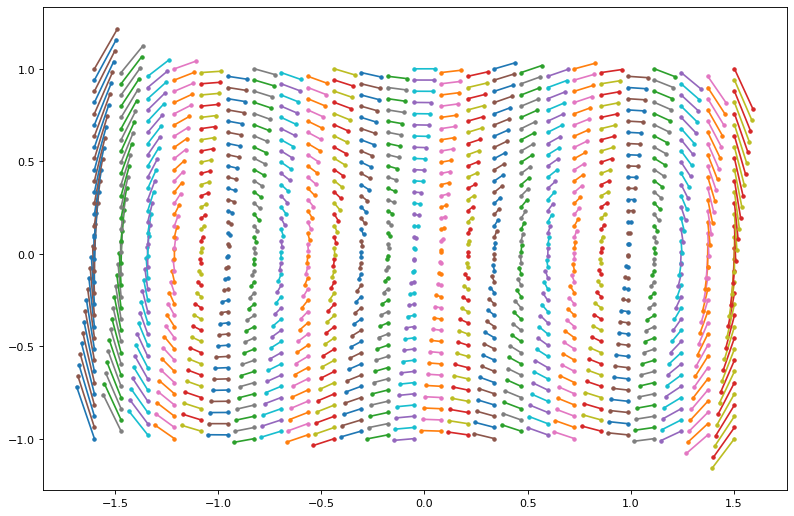

In [56]:
# visualize subset of trajectories
figure(figsize=(12, 8), dpi=80)
[plt.plot(trajs[i, 0], trajs[i, 1], '.-') for i in range(0, trajs.shape[0], 12)]
plt.show()


In [57]:
# DoubleGyre

# define grid
N = 100
x_min, x_max = [0, 2]
y_min, y_max = [0, 1]
Nx, Ny = [N, N]
grid = [(x_min, x_max, Nx), (y_min, y_max, Ny)] 

# define time
t_0, t_n = 0, 0.1
trajs = integrate_ivp(DoubleGyre, grid, t_n, t_0=t_0)
trajs = np.take(trajs, [0, -1], axis=-1) # take only first and last time step 
np.save(f'./DoubleGyre_t={t_0}-{t_n}', trajs)


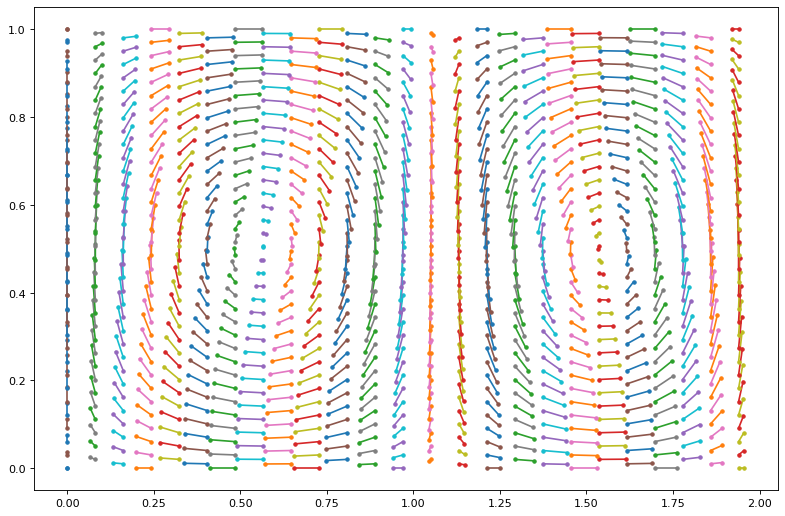

In [58]:
# visualize subset of trajectories
figure(figsize=(12, 8), dpi=80)
[plt.plot(trajs[i, 0], trajs[i, 1], '.-') for i in range(0, trajs.shape[0], 12)]
plt.show()


In [59]:
# DavisSkodje

# define grid
N = 100
x_min, x_max = [0, 2]
y_min, y_max = [0, 1.4]
Nx, Ny = [N, N]
grid = [(x_min, x_max, Nx), (y_min, y_max, Ny)] 

# define time
t_0, t_n = 0, 0.01
trajs = integrate_ivp(DavisSkodje, grid, t_n, t_0=t_0)
trajs = np.take(trajs, [0, -1], axis=-1) # take only first and last time step 
np.save(f'./DavisSkodje_t={t_0}-{t_n}', trajs)



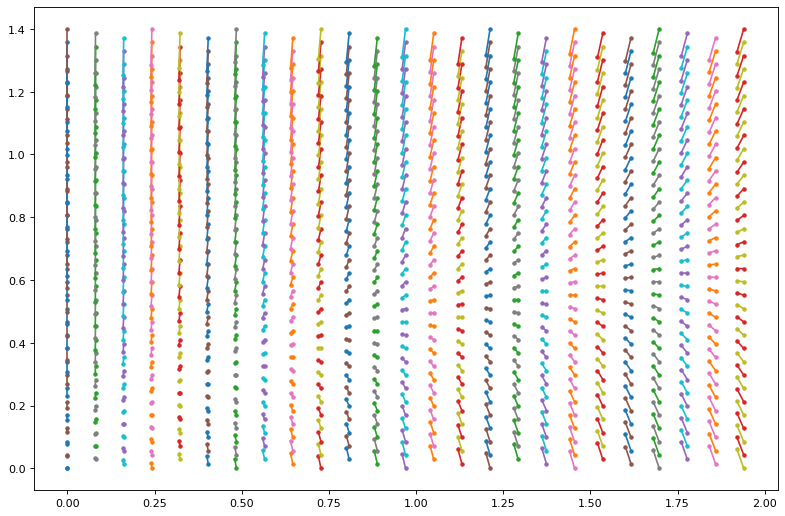

In [60]:
# visualize subset of trajectories
figure(figsize=(12, 8), dpi=80)
[plt.plot(trajs[i, 0], trajs[i, 1], '.-') for i in range(0, trajs.shape[0], 12)]
plt.show()
